## 08. Assigning AGNs to halos pairs parameterized by $T_{\rm MM}$ and $X_{\rm off}$

Following up on the conlcusions derived from notebook 05, and 06, this notebook takes the indicies of pairs, for chosen bins or Tmm or Xoff, and assigns them to have single/dual AGNs. Rather than following the complicated path of PDFs described in Notebook 07, this Notebook simply defines cuts in choosing$T_{\rm MM}$ and $X_{\rm off}$.

1. Loading data and defining input parameters
2. Studying the potentially AGN hosting pairs 

**Script written by**: Soumya Shreeram <br>
**Project supervised by**: Johan Comparat <br>
**Date**: 19th May 2021

Import required packages

In [1]:
# astropy modules
import astropy.units as u
import astropy.io.fits as fits

from astropy.table import Table, Column
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM, z_at_value

import numpy as np

# system imports
import os
import sys
import importlib as ib

# plotting imports
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

from pandas import DataFrame
from scipy.stats import gaussian_kde

Load the imported file(s) that contains all the functions used in this notebooks

In [2]:
%matplotlib inline
font = {'family' : 'serif',
        'weight' : 'medium',
        'size'   : 22}
matplotlib.rc('font', **font)

In [3]:
sys.path.append('imported_files/')
import Exploring_DM_Halos as edh
import Agn_incidence_from_Major_Mergers as aimm
import Comparison_simulation_with_literature_data as cswl
import plotting_cswl05 as pt
import Modelling_AGN_fractions_from_literature as mafl

### 1. Defining input parameters

In [4]:
# look back into redshifts until...
redshift_limit = 2

# pixel number from the simulation file
pixel_no = '000000'

# define color palatte
pal = sns.hls_palette(10, h=.5, s=1).as_hex()
sns.set_context("paper", font_scale=2, rc={"lines.linewidth":2})

Define cosmology used in the notebook

In [5]:
cosmo = FlatLambdaCDM(H0=67.77*u.km/u.s/u.Mpc, Om0=0.307115)
h = 0.6777
L_box = 1000.0 / h

vol = cosmo.comoving_volume(redshift_limit)*(53)/(129600/np.pi)

Parameters for creating the Major Merger catalogue.

In [6]:
# get shell volume and projected radius bins [Mpc]
r_p, shell_volume = aimm.shellVolume()

# max mass ratio to classify as a major merger [dimensionless]
mass_max = 3

# defining the redshift bin for a merger in terms of dv = c*z [km/s]
dz_cut = 0.001

Booleans if one wants to skip running parts of the code

### 2. Open files and get relevant data

In [7]:
hd_agn, hd_halo, _ = edh.getHeaders(pixel_no, np.array(['agn', 'halo']))

Extracting positions and redshifts of the AGNs, galaxies, and halos

In [8]:
# halos
_, _, conditions_halo = edh.getGalaxyData(hd_halo, '', redshift_limit)

# agns
_, _, conditions_agn = edh.getAgnData(hd_agn, agn_FX_soft=0, redshift_limit=redshift_limit)    

hd_z_halo = hd_halo[conditions_halo]
hd_z_agn = hd_agn[conditions_agn]

print("Halos: %d"%(len(hd_z_halo) ))

Halos: 4506611


In [9]:
print("Agn: %d. %.2f %s of the halos are currently assigned AGNs"%(len(hd_z_agn), (100*len(hd_z_agn)/len(hd_z_halo)), '%'))

Agn: 1076520. 23.89 % of the halos are currently assigned AGNs


In [10]:
xoff_all = hd_z_halo['HALO_Xoff']/hd_z_halo['HALO_Rvir']
xoff_min, xoff_max = np.min(xoff_all), np.max(xoff_all)
xoff_arr = np.load('Data/pairs_z%.1f/xoff_deciles.npy'%redshift_limit, allow_pickle=True)
xoff_bins_arr = [[xoff_arr[i], xoff_arr[i+1]] for i in np.arange(len(xoff_arr)-1)]

# tmm parameters
diff_t_mm_arr = np.load('Data/diff_t_mm_arr_z%.1f.npy'%(redshift_limit), allow_pickle=True)
dt_m_arr = np.load('Data/pairs_z%.1f/t_mm_deciles.npy'%redshift_limit, allow_pickle=True)
dt_m_bins_arr = [[dt_m_arr[i], dt_m_arr[i+1]] for i in np.arange(len(dt_m_arr)-1)]

### 5. Load the pairs for the chosen $T_{\rm MM}$ and $X_{\rm off}$ bins

Notebook 5 developed this plot showing the fraction of pairs in $T_{\rm MM}$ bins



![image info](./figures/frac_tmm.png)

Notebook 6 developed this plot showing the fraction of pairs in different $X_{\rm off}$ bins


![image info](./figures/frac_xoff.png)

In [11]:
pairs_all = cswl.openPairsFiles(key = 'all')

Based on these results, we chose pairs in the following bins of $T_{\rm MM}$ and $X_{\rm off}$

Model 2

AGNs: 462914


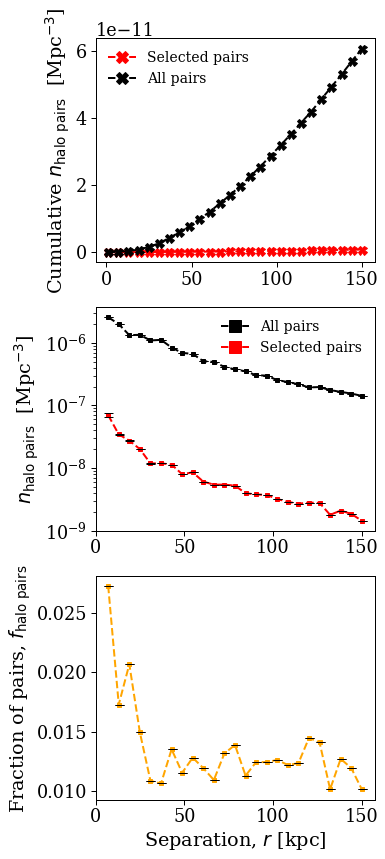

In [44]:
xoff_min, xoff_max = 0.1, 0.2
tmm_min, tmm_max = 1.0, 3.0

cswl.getPlotModel(pairs_all[1], hd_z_halo, diff_t_mm_arr, vol, xoff_min=xoff_min, xoff_max=xoff_max,tmm_min=tmm_min, tmm_max=tmm_max)

AGNs: 310430


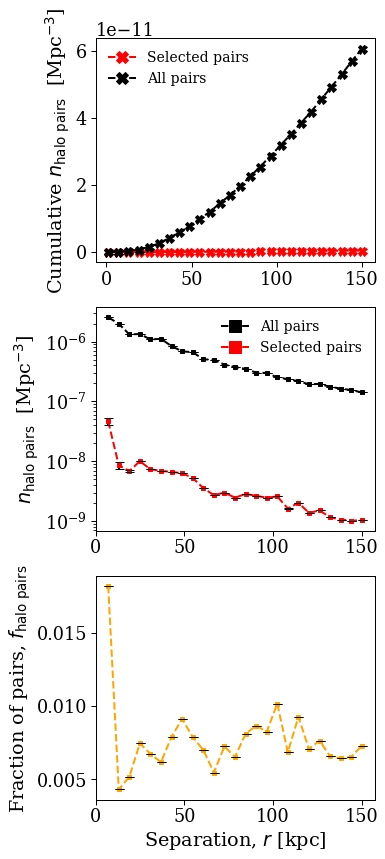

In [45]:
xoff_min, xoff_max = 0.09, 0.17
tmm_min, tmm_max = 0.6, 1.8

cswl.getPlotModel(pairs_all[1], hd_z_halo, diff_t_mm_arr, vol, xoff_min=xoff_min, xoff_max=xoff_max,tmm_min=tmm_min, tmm_max=tmm_max)

AGNs: 516213


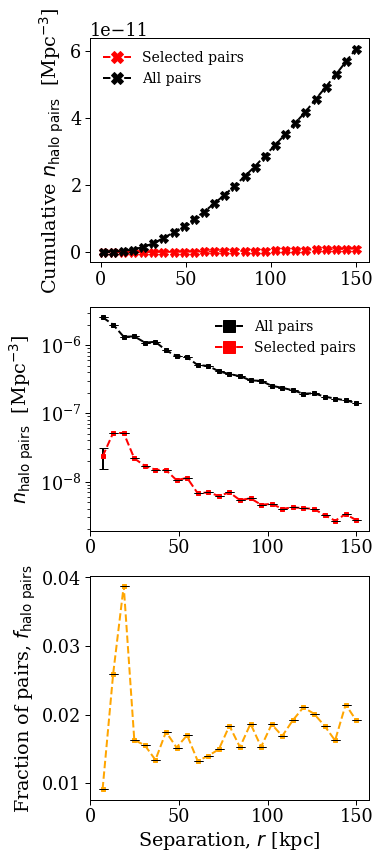

In [48]:
xoff_min, xoff_max = 0.10, 0.54
tmm_min, tmm_max = 0.6, 2.3

cswl.getPlotModel(pairs_all[1], hd_z_halo, diff_t_mm_arr, vol, xoff_min=xoff_min, xoff_max=xoff_max,tmm_min=tmm_min, tmm_max=tmm_max)

AGNs: 387543


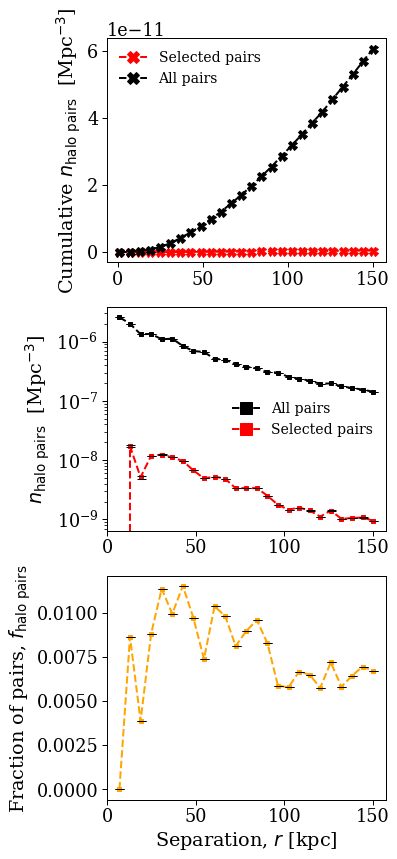

In [49]:
xoff_min, xoff_max = 0.06, 0.10
tmm_min, tmm_max = 0.6, 2.3

cswl.getPlotModel(pairs_all[1], hd_z_halo, diff_t_mm_arr, vol, xoff_min=xoff_min, xoff_max=xoff_max,tmm_min=tmm_min, tmm_max=tmm_max)

AGNs: 408270


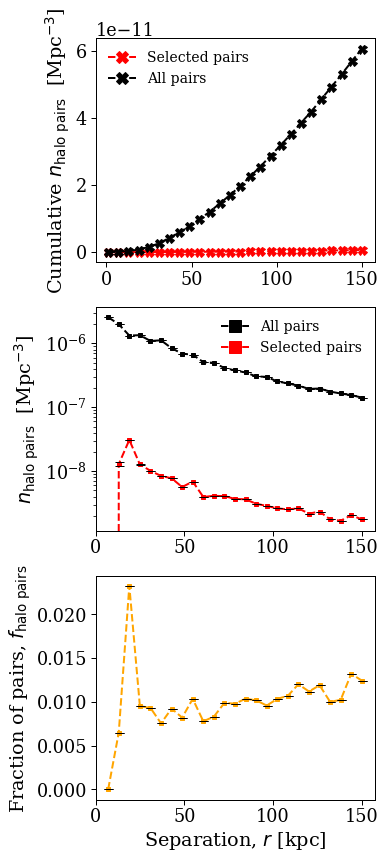

In [50]:
xoff_min, xoff_max = 0.10, 0.54
tmm_min, tmm_max = 0.6, 1.8

cswl.getPlotModel(pairs_all[1], hd_z_halo, diff_t_mm_arr, vol, xoff_min=xoff_min, xoff_max=xoff_max,tmm_min=tmm_min, tmm_max=tmm_max)

AGNs: 328118


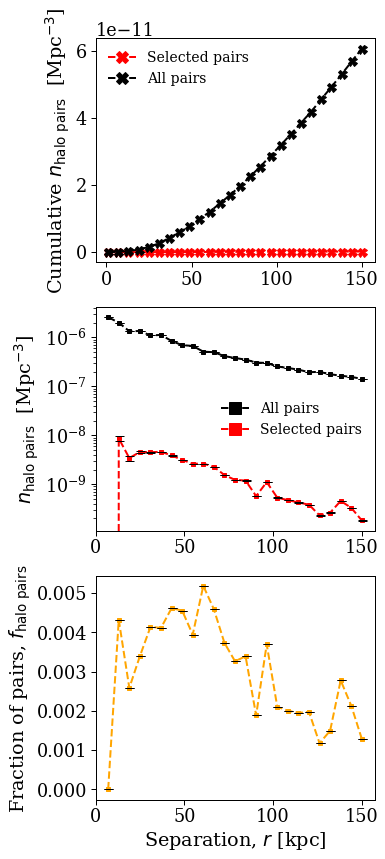

In [51]:
xoff_min, xoff_max = 0.03, 0.06
tmm_min, tmm_max = 0.6, 2.3

cswl.getPlotModel(pairs_all[1], hd_z_halo, diff_t_mm_arr, vol, xoff_min=xoff_min, xoff_max=xoff_max,tmm_min=tmm_min, tmm_max=tmm_max)

AGNs: 434860


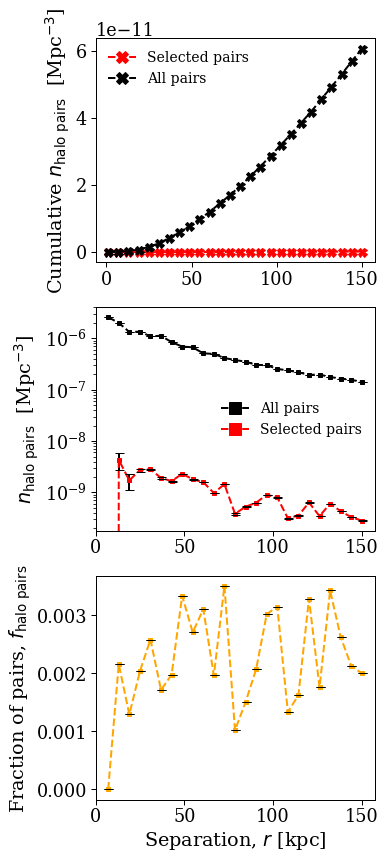

In [53]:
xoff_min, xoff_max = 0.06, 0.1
tmm_min, tmm_max = 2.8, 4.4

cswl.getPlotModel(pairs_all[1], hd_z_halo, diff_t_mm_arr, vol, xoff_min=xoff_min, xoff_max=xoff_max,tmm_min=tmm_min, tmm_max=tmm_max)

AGNs: 415006


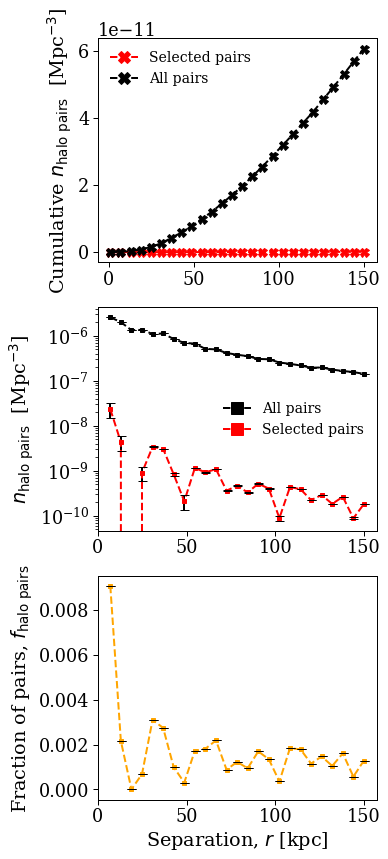

In [54]:
xoff_min, xoff_max = 0.00, 0.05
tmm_min, tmm_max = 1.8, 3.2

cswl.getPlotModel(pairs_all[1], hd_z_halo, diff_t_mm_arr, vol, xoff_min=xoff_min, xoff_max=xoff_max,tmm_min=tmm_min, tmm_max=tmm_max)

AGNs: 142941


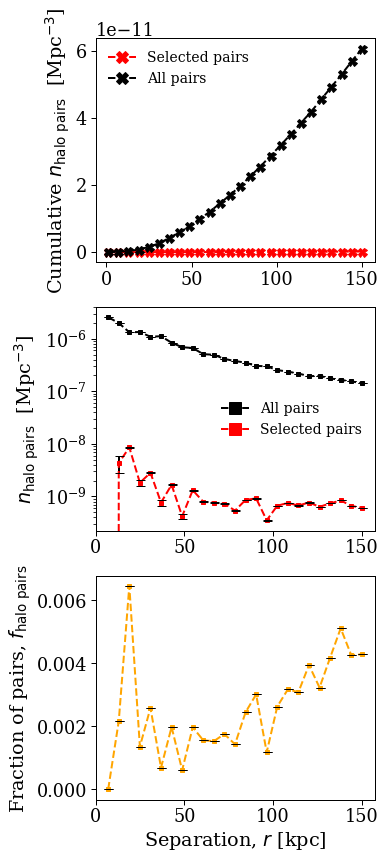

In [55]:
xoff_min, xoff_max = 0.17, 0.54
tmm_min, tmm_max = 0.0, 0.6

cswl.getPlotModel(pairs_all[1], hd_z_halo, diff_t_mm_arr, vol, xoff_min=xoff_min, xoff_max=xoff_max,tmm_min=tmm_min, tmm_max=tmm_max)